# Student: Ta Quoc Viet (299954)

# Pattern Recognition Computer Exercises 4

# Task 1



Prediction for the year 2050 is 32667.60


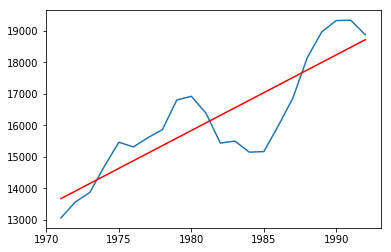

In [3]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

ALABAMA_DATA_PATH = './alabama.txt'
data = np.loadtxt(ALABAMA_DATA_PATH)
X, Y = data[:, 0], data[:, 1]
plt.plot(X, Y)


def plot_separating_line(w0, w1, bounds):
    x = np.linspace(bounds[0], bounds[1], 1000)
    y = w1 * x + w0
    plt.plot(x, y, '-r')


def linear_regression(X, Y):
    x_bar = np.mean(X)
    y_bar = np.mean(Y)
    w1 = np.sum(((X - x_bar) * (Y - y_bar))) / np.sum(np.square(X - x_bar))
    w0 = y_bar - w1 * x_bar
    return w0, w1


w0, w1 = linear_regression(X, Y)
plot_separating_line(w0, w1, [np.min(X), np.max(X)])
prediction_for2050 = w1 * 2050 + w0
print('Prediction for the year 2050 is {:.2f}'.format(prediction_for2050))



We see that the prediction is too high, so maybe it's not the best choice for time-series prediction.

# Task 2

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


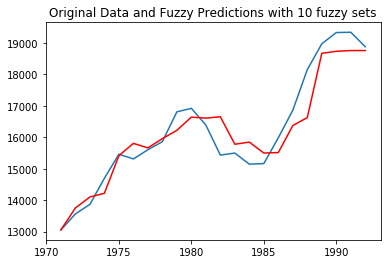

In [33]:
# Some util functions copied from exercises 2
def triangular(x, params):
    [a, b, c] = params
    return np.piecewise(x, [x < a, a <= x, b <= x, c <= x],
                        [0, lambda x: (x - a) / (b - a), lambda x: (c - x) / (c - b), 0])


def min_implication(min, y):
    y[y > min] = min
    return y


def aggregate(Y):
    return np.max(Y, axis=0)


def coa(x, y):
    return np.sum(x * y) / np.sum(y)


def remove_duplicates(x):
    return list(dict.fromkeys(x))


def predict(x, y_bounds, fuzzy_sets, rules):
    lin_y_min, lin_y_max = y_bounds[0], y_bounds[1]
    lin_y = np.linspace(lin_y_min, lin_y_max, (lin_y_max - lin_y_min) * 100)
    Y = []
    for i in range(len(fuzzy_sets)):
        input_set = fuzzy_sets[i]
        output_sets = [fuzzy_sets[j] for j in rules[i]]
        if len(output_sets) == 0:
            continue
        calculated_input = triangular(x, input_set)
        y = np.array(
            [min_implication(calculated_input, triangular(lin_y, output_sets[j])) for j in range(len(output_sets))])
        Y.append(aggregate(y))
    aggregated_Y = aggregate(np.array(Y))
    return coa(lin_y, aggregated_Y)


def fuzzy_prediction(num_fuzzy_sets, Y):
    [min_enrol, max_enrol] = [np.min(Y), np.max(Y)]
    fuzzy_edges = np.linspace(min_enrol, max_enrol, num_fuzzy_sets)
    fuzzy_edges = np.insert(fuzzy_edges, 0, min_enrol - 1000)
    fuzzy_edges = np.append(fuzzy_edges, max_enrol + 1000)
    fuzzy_sets = [fuzzy_edges[i: i + 3] for i in range(num_fuzzy_sets)]
    fuzzified_data = []
    for y in Y:
        memberships = [triangular(y, fuzzy_edges[i: i + 3]) for i in range(num_fuzzy_sets)]
        fuzzified_data.append(np.argmax(memberships))

    rules = [[] for i in range(num_fuzzy_sets)]
    for i in range(len(fuzzified_data) - 1):
        rules[fuzzified_data[i]].append(fuzzified_data[i + 1])

    rules = [remove_duplicates(r) for r in rules]
    predicted_Y = [Y[0]]
    for y in Y[0:-1]:
        predicted_Y.append(predict(y, [min_enrol, max_enrol], fuzzy_sets, rules))
    return predicted_Y


def show_predicted_results(X, Y, Y_hat, num_fuzzy_sets):
    plt.plot(X, Y)
    plt.plot(X, Y_hat, c='r')
    plt.title('Original Data and Fuzzy Predictions with {} fuzzy sets'.format(num_fuzzy_sets))
    plt.show()

NUM_FUZZY_SETS = 10
predicted_Y = fuzzy_prediction(NUM_FUZZY_SETS, Y)
show_predicted_results(X, Y, predicted_Y, NUM_FUZZY_SETS)

We can see that the predictions are pretty good. Now we're going to try different number of fuzzy sets to see which one works the best:

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


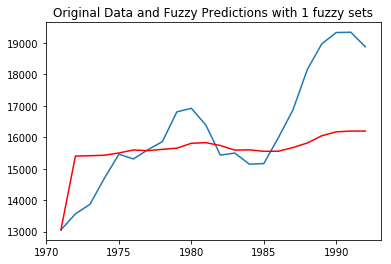

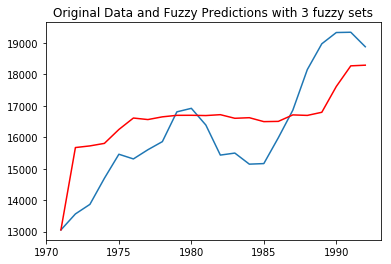

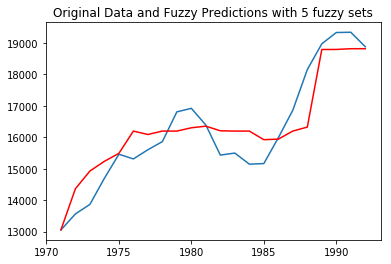

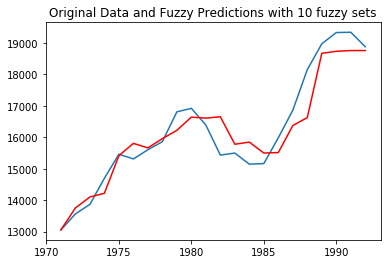

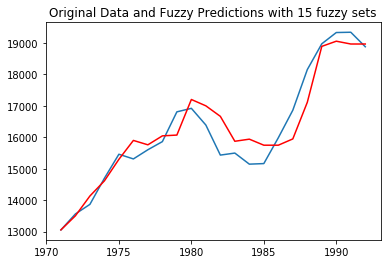

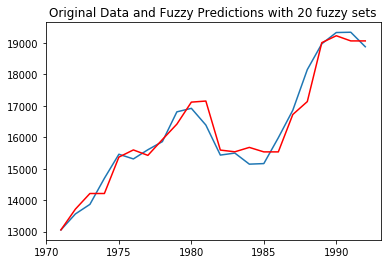

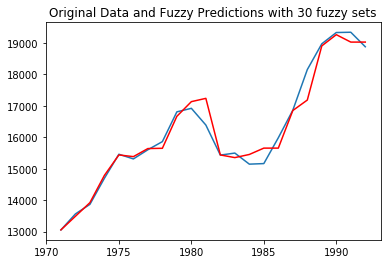

In [35]:
tests = [1, 3, 5, 10, 15, 20, 30]
for test in tests:
    predicted_Y = fuzzy_prediction(test, Y)
    show_predicted_results(X, Y, predicted_Y, test)

We can see that:
- IMHO, number of fuzzy sets between 10-15 work fine.
- If this number is too low, the model will underfit, the predictions, thus are not accurate.
- If this number is too high, the model will overfit, the predictions will follow closely to the true data, but will not generalize well. Also, the running time is significantly longer.